In [68]:
# Suppress all warnings for cleaner output, but use with caution.
import warnings
warnings.filterwarnings('ignore')

In [69]:
# Import essential libraries for data manipulation, analysis, and visualization.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [70]:
# Read spam dataset from a tab-separated file into a DataFrame.
dataset = pd.read_csv('spam.tsv',sep='\t')

In [71]:
# Check for null values in each column of the dataset and print results.
for col in dataset.columns:
    print(col,' - ',dataset[col].isnull().values.any())

label  -  False
message  -  False
length  -  False
punct  -  False


In [72]:
# Generate descriptive statistics for numerical columns in the dataset.
dataset.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [73]:
# Count the number of instances labeled as "ham" in the dataset.
print(len(dataset[dataset['label']=='ham']))

4825


In [74]:

# Count the number of instances labeled as "spam" in the dataset.
print(len(dataset[dataset['label']=='spam']))

747


In [75]:
# Count occurrences of each unique value in the 'label' column and print results
print(dataset['label'].value_counts())

label
ham     4825
spam     747
Name: count, dtype: int64


In [76]:
# Extract indices of ham and spam emails from the dataset based on label values.
ham = dataset[dataset['label']=='ham'].index
spam = dataset[dataset['label']=='spam'].index

In [77]:
# Randomly select indices from ham to match spam count, then combine with spam indices.
random_ham = np.random.choice(ham,len(spam),replace = False)
dataset_indices = np.concatenate((random_ham, spam))

In [78]:
# Select specific rows and all columns from the dataset using dataset_indices.
datasets = dataset.iloc[dataset_indices,:]

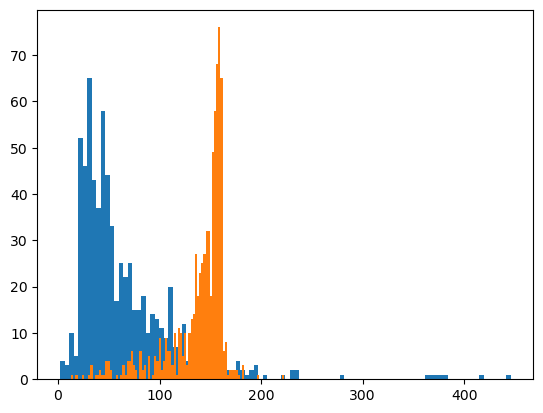

In [79]:
#Plot separate histograms of 'length' for 'ham' and 'spam' labels, using 100 bins for each.
plt.hist(datasets[datasets['label']=='ham']['length'],bins=100)
plt.hist(datasets[datasets['label']=='spam']['length'],bins=100)
plt.show()

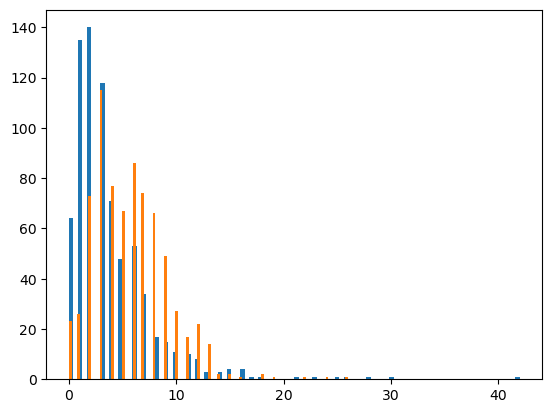

In [80]:
# Visualize the distribution of punctuation usage in ham and spam emails using histograms.

plt.hist(datasets[datasets['label']=='ham']['punct'],bins=100)
plt.hist(datasets[datasets['label']=='spam']['punct'],bins=100)
plt.show()

In [81]:
# Split data into 70% training and 30% testing sets, using consistent random shuffling for reproducibility.

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(datasets['message'],datasets['label'],test_size=0.3,random_state=0)

In [82]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.3+ KB


In [83]:
#Import tools for text feature extraction, model building, and pipeline creation

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [84]:
classifier = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", RandomForestClassifier(n_estimators=200))])

In [85]:
classifier.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(n_estimators=200))])

In [86]:
y_pred = classifier.predict(x_test)

In [87]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, y_pred))

[[225   2]
 [ 24 198]]


<Axes: >

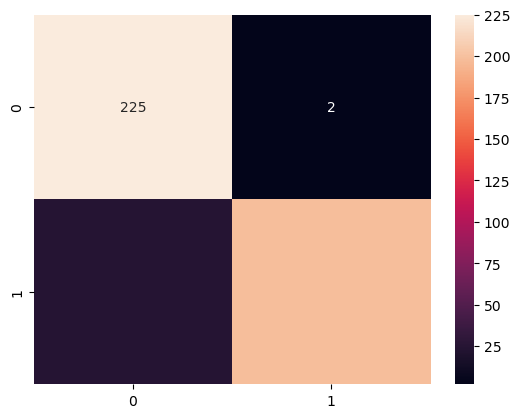

In [88]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,fmt='g')

In [89]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.90      0.99      0.95       227
        spam       0.99      0.89      0.94       222

    accuracy                           0.94       449
   macro avg       0.95      0.94      0.94       449
weighted avg       0.95      0.94      0.94       449



In [90]:
from sklearn.svm import SVC
svm = Pipeline([('tfidf',TfidfVectorizer()),('svm',SVC())])
svm.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svm', SVC())])

In [91]:
y_pred1 = svm.predict(x_test)
print(confusion_matrix(y_test, y_pred1))

[[223   4]
 [ 12 210]]


<Axes: >

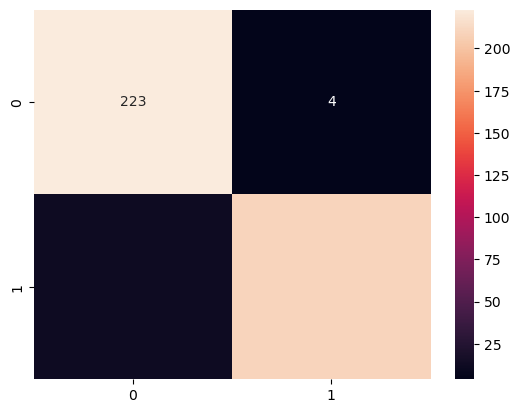

In [92]:
sns.heatmap(confusion_matrix(y_test, y_pred1), annot=True,fmt='g')


In [93]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

         ham       0.95      0.98      0.97       227
        spam       0.98      0.95      0.96       222

    accuracy                           0.96       449
   macro avg       0.97      0.96      0.96       449
weighted avg       0.96      0.96      0.96       449



In [95]:
test_set = [input("Enter the sentence:")]
print(test_set)
print(svm.predict(test_set))

['free entry to first show for tollywood movie']
['spam']
